In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from scipy.constants import h, c, k

In [3]:
u_filter = pd.read_csv('Paranal_VIMOS.U.dat', sep=' ', header=None)
b_filter = pd.read_csv('Paranal_VIMOS.B.dat', sep=' ', header=None)
v_filter = pd.read_csv('Paranal_VIMOS.V.dat', sep=' ', header=None)
r_filter = pd.read_csv('Paranal_VIMOS.R.dat', sep=' ', header=None)
i_filter = pd.read_csv('Paranal_VIMOS.I.dat', sep=' ', header=None)

filtros = {'u': u_filter, 'b': b_filter, 'v': v_filter, 'r': r_filter, 'i': i_filter}

In [4]:
# Renombro las columnas 
for key in filtros:
    filtros[key].columns = ['Wavelength', 'Transmission']

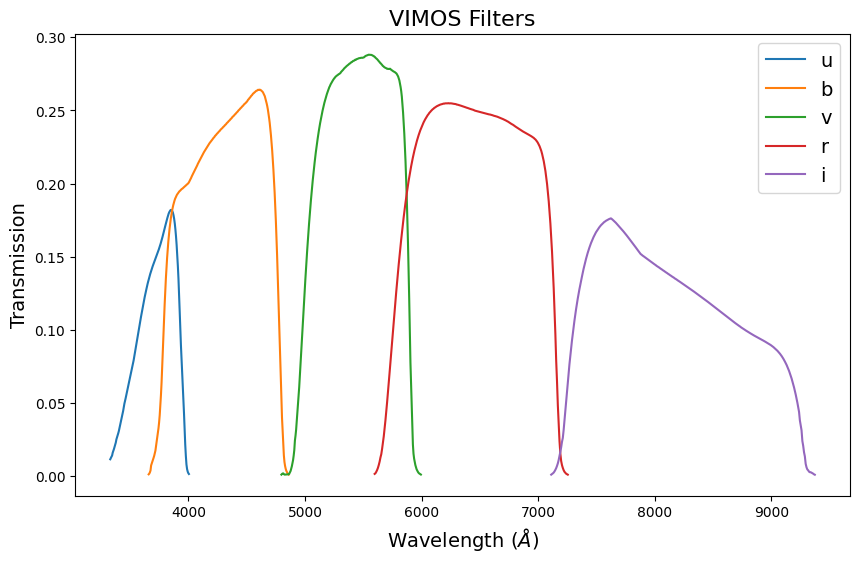

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
for key in filtros:
    ax.plot(filtros[key]['Wavelength'], filtros[key]['Transmission'], label=key)
ax.set_xlabel('Wavelength ($\AA$)', fontsize=14)
ax.set_ylabel('Transmission', fontsize=14)
ax.set_title('VIMOS Filters', fontsize=16)
ax.legend(fontsize=14)

In [6]:
# Normalizar los filtros para que el peak sea 1, guardarlo en una columna nueva llamada "Transmission normalized"
for key in filtros:
    filtros[key]['Transmission normalized'] = filtros[key]['Transmission'] / filtros[key]['Transmission'].max()

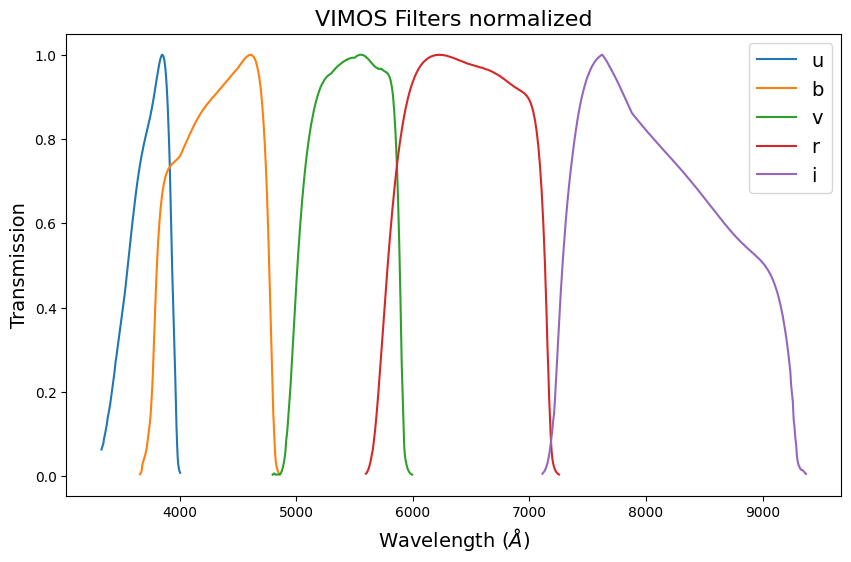

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
for key in filtros:
    ax.plot(filtros[key]['Wavelength'], filtros[key]['Transmission normalized'], label=key)
ax.set_xlabel('Wavelength ($\AA$)', fontsize=14)
ax.set_ylabel('Transmission', fontsize=14)
ax.set_title('VIMOS Filters normalized', fontsize=16)
ax.legend(fontsize=14)

In [8]:
data = pd.read_excel('C:/Users/rodri\Desktop/astrofis/t1/e490_00a_amo.xls')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
W_wavelength_microns = data['Wavelength, µm']
W_flux_microns = data['Wehrli, W/m2/µm']

# Quitar los valores de nan
W_wavelength_microns = W_wavelength_microns.dropna()
W_flux_microns = W_flux_microns.dropna()


W_wavelength_angstroms = (np.array(W_wavelength_microns)*u.micron).to(u.angstrom)
W_flux_ergs = (np.array(W_flux_microns)*(u.watt / u.m**2 / u.micron)).to(u.erg / u.s / u.cm**2 / u.angstrom)
solar_spectrum = pd.DataFrame({'Wavelength': W_wavelength_angstroms.value, 'Flux': W_flux_ergs.value})

In [9]:
def band_fit(band):
    poli_fit = np.polyfit(band['Wavelength'], band['Transmission normalized'], 15)
    poli = np.poly1d(poli_fit)
    x_new = np.linspace(band['Wavelength'].min(), band['Wavelength'].max(), 1000)
    y_new = poli(x_new)
    return pd.DataFrame({'Wavelength': x_new, 'Transmission': y_new})

In [10]:
fit_u = band_fit(filtros['u'])
fit_b = band_fit(filtros['b'])
fit_v = band_fit(filtros['v'])
fit_r = band_fit(filtros['r'])
fit_i = band_fit(filtros['i'])

C:\Users\rodri\AppData\Local\Temp\ipykernel_16528\3238851769.py:1: RankWarning: Polyfit may be poorly conditioned
  fit_u = band_fit(filtros['u'])
C:\Users\rodri\AppData\Local\Temp\ipykernel_16528\3238851769.py:2: RankWarning: Polyfit may be poorly conditioned
  fit_b = band_fit(filtros['b'])
C:\Users\rodri\AppData\Local\Temp\ipykernel_16528\3238851769.py:3: RankWarning: Polyfit may be poorly conditioned
  fit_v = band_fit(filtros['v'])
C:\Users\rodri\AppData\Local\Temp\ipykernel_16528\3238851769.py:4: RankWarning: Polyfit may be poorly conditioned
  fit_r = band_fit(filtros['r'])
C:\Users\rodri\AppData\Local\Temp\ipykernel_16528\3238851769.py:5: RankWarning: Polyfit may be poorly conditioned
  fit_i = band_fit(filtros['i'])


In [11]:
# Transformar todos los valores de wavelength a enteros tanto para el espectro solar como para los filtros
solar_spectrum['Wavelength'] = solar_spectrum['Wavelength'].astype(int)
fit_u['Wavelength'] = fit_u['Wavelength'].astype(int)
fit_b['Wavelength'] = fit_b['Wavelength'].astype(int)
fit_v['Wavelength'] = fit_v['Wavelength'].astype(int)
fit_r['Wavelength'] = fit_r['Wavelength'].astype(int)
fit_i['Wavelength'] = fit_i['Wavelength'].astype(int)

# Eliminar filas de longitud de onda repetidas para filtros
fit_u = fit_u.drop_duplicates(subset=['Wavelength'])
fit_b = fit_b.drop_duplicates(subset=['Wavelength'])
fit_v = fit_v.drop_duplicates(subset=['Wavelength'])
fit_r = fit_r.drop_duplicates(subset=['Wavelength'])
fit_i = fit_i.drop_duplicates(subset=['Wavelength'])

In [12]:
# Quedarse solo con los valores de longitud de onda que esten en el espectro solar
fit_u = fit_u[fit_u['Wavelength'].isin(solar_spectrum['Wavelength'])]
fit_b = fit_b[fit_b['Wavelength'].isin(solar_spectrum['Wavelength'])]
fit_v = fit_v[fit_v['Wavelength'].isin(solar_spectrum['Wavelength'])]
fit_r = fit_r[fit_r['Wavelength'].isin(solar_spectrum['Wavelength'])]
fit_i = fit_i[fit_i['Wavelength'].isin(solar_spectrum['Wavelength'])]

In [13]:
# Normalizar el flujo del sol para que el peak sea 1
solar_spectrum['Flux normalized'] = solar_spectrum['Flux'] / solar_spectrum['Flux'].max()

In [14]:
# Multiplicar flux por transmission si el valor de wavelength es el mismo
fit_u['Flux solar'] = fit_u['Transmission'] * solar_spectrum['Flux']
fit_b['Flux solar'] = fit_b['Transmission'] * solar_spectrum['Flux']
fit_v['Flux solar'] = fit_v['Transmission'] * solar_spectrum['Flux']
fit_r['Flux solar'] = fit_r['Transmission'] * solar_spectrum['Flux']
fit_i['Flux solar'] = fit_i['Transmission'] * solar_spectrum['Flux']

Text(0.5, 1.0, 'Solar Spectrum and VIMOS Filters')

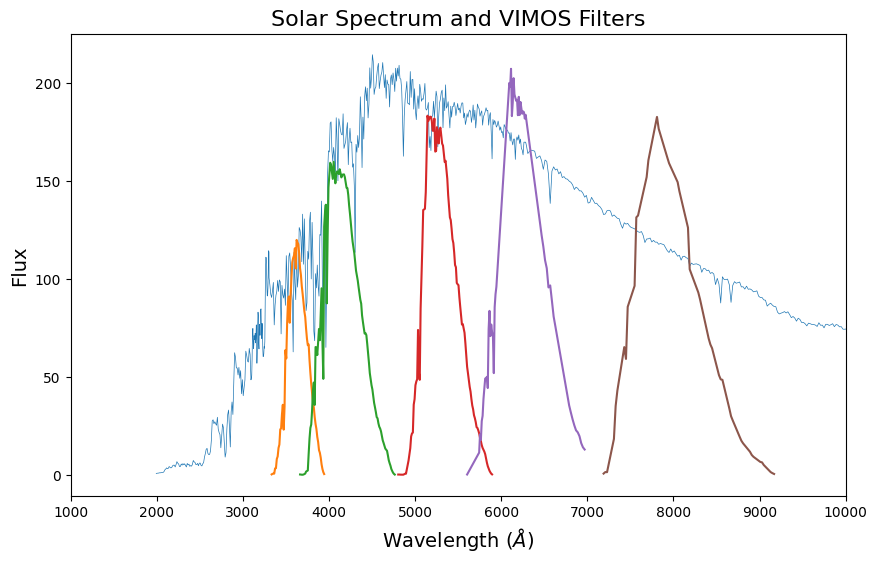

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(solar_spectrum['Wavelength'], solar_spectrum['Flux'], label='Solar Spectrum', linewidth=0.5)
#ax.scatter(fit_u['Wavelength'], fit_u['Transmission'], label='U')
ax.plot(fit_u['Wavelength'], fit_u['Flux solar'])
ax.plot(fit_b['Wavelength'], fit_b['Flux solar'])
ax.plot(fit_v['Wavelength'], fit_v['Flux solar'])
ax.plot(fit_r['Wavelength'], fit_r['Flux solar'])
ax.plot(fit_i['Wavelength'], fit_i['Flux solar'])
ax.set_xlim(1000, 10000)
ax.set_xlabel('Wavelength ($\AA$)', fontsize=14)
ax.set_ylabel('Flux', fontsize=14)
ax.set_title('Solar Spectrum and VIMOS Filters', fontsize=16)

# 1.C

In [62]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 3e-6, 1e-9)

# intensity at 4000K, 5000K, 6000K, 7000K
mira_spectrum = planck(wavelengths, 3000.)
rigel_spectrum = planck(wavelengths, 11000.)
saif_spectrum = planck(wavelengths, 32500.)
naos_spectrum = planck(wavelengths, 42000.)

C:\Users\rodri\AppData\Local\Temp\ipykernel_16528\4234274336.py:8: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


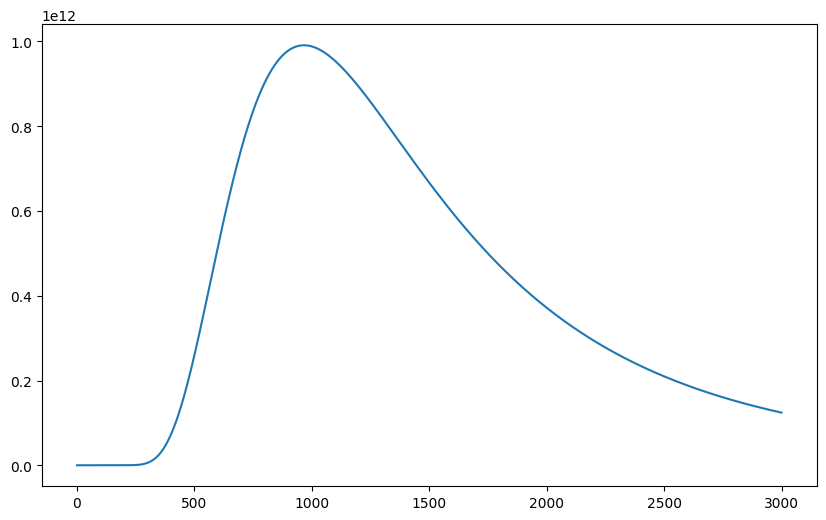

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(wavelengths*1e9, mira_spectrum, label='Mira')
#ax.plot(wavelengths*1e9, rigel_spectrum, label='Rigel')
#ax.plot(wavelengths*1e9, saif_spectrum, label='Saif')
#ax.plot(wavelengths*1e9, naos_spectrum, label='Naos')

In [42]:
solar_spectrum['Wavelength']

0        1994
1        2004
2        2014
3        2024
4        2034
        ...  
915     54449
916     59249
917     66149
918     77849
919    100749
Name: Wavelength, Length: 920, dtype: int32